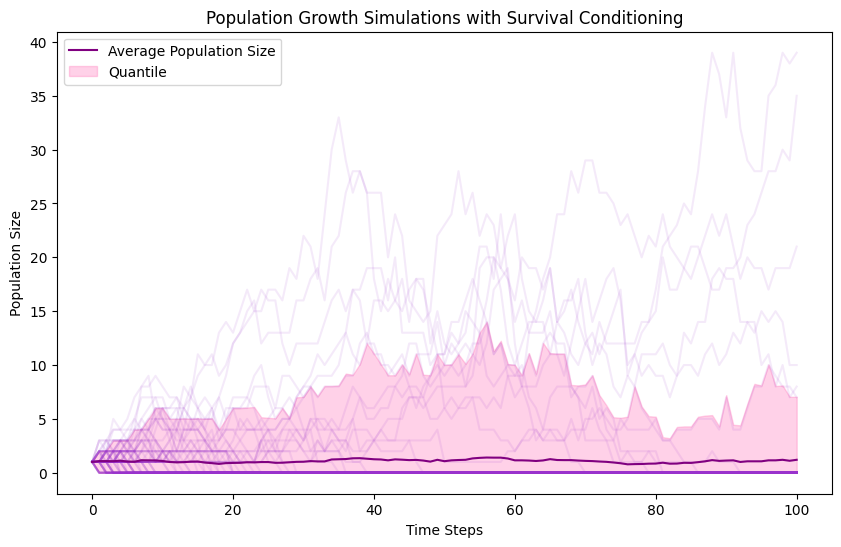

Extinction Probability: 0.94


In [15]:
#logistic model survival conditioned
import numpy as np
import matplotlib.pyplot as plt

def set_parameters(initial_population=1, birth_rate=0.2, death_rate=0.1, survival_rate=0.9):
    params = {
        'initial_population': initial_population,
        'birth_rate': birth_rate,
        'death_rate': death_rate,
        'survival_rate': survival_rate
    }
    return params

def simulate_population_growth(params, num_steps=100):
    population_size = params['initial_population']
    population_sizes = [population_size]
    
    for step in range(num_steps):
        births = np.random.poisson(params['birth_rate'] * population_size)
        deaths = np.random.poisson(params['death_rate'] * population_size)
        survivors = np.random.binomial(population_size, params['survival_rate'])
        population_size = survivors + births - deaths
        population_size = max(0, population_size)
        population_sizes.append(population_size)
    
    return population_sizes

def run_multiple_simulations_with_quantiles(params, num_simulations=100, num_steps=100):
    all_population_sizes = []
    
    for _ in range(num_simulations):
        population_sizes = simulate_population_growth(params, num_steps)
        all_population_sizes.append(population_sizes)
    
    all_population_sizes = np.array(all_population_sizes)
    average_population_sizes = np.mean(all_population_sizes, axis=0)
    lower_quantile = np.quantile(all_population_sizes, 0.05, axis=0)
    upper_quantile = np.quantile(all_population_sizes, 0.95, axis=0)
    
    extinction_probability = np.mean(all_population_sizes[:, -1] == 0)
    
    return list(range(num_steps + 1)), all_population_sizes, average_population_sizes, lower_quantile, upper_quantile, extinction_probability

def plot_multiple_simulations_with_quantiles(time_points, all_population_sizes, average_population_sizes, lower_quantile, upper_quantile):
    plt.figure(figsize=(10, 6))
    
    for population_sizes in all_population_sizes:
        plt.plot(time_points, population_sizes, color='darkorchid', alpha=0.1)
    
    plt.plot(time_points, average_population_sizes, color='purple', label='Average Population Size')
    plt.fill_between(time_points, lower_quantile, upper_quantile, color='hotpink', alpha=0.3, label='Quantile')
    
    plt.xlabel('Time Steps')
    plt.ylabel('Population Size')
    plt.legend()
    plt.title('Population Growth Simulations with Survival Conditioning')
    plt.show()

# Example usage
params = set_parameters(initial_population=1, birth_rate=0.2, death_rate=0.1, survival_rate=0.9)

num_simulations = 100
all_time_points, all_population_sizes, average_population_sizes, lower_quantile, upper_quantile, extinction_probability = run_multiple_simulations_with_quantiles(params, num_simulations)

plot_multiple_simulations_with_quantiles(all_time_points, all_population_sizes, average_population_sizes, lower_quantile, upper_quantile)

print(f"Extinction Probability: {extinction_probability:.2f}")
